# 1. 데이터 불러오기

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
import sys

In [67]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [68]:
data1=pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/data1_noDT.csv') # 컬럼명 숫자로 들어가게
data1.head(1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,time,windForce,tem,temQC,rain,rainQC,windSpeed,windSpeedQC,windDirection,windDirectionQC,snow,snow3Hour,cloud,middleCloud,clodeUn,highCloud
0,2013-01-01,0:00,0.0,1.3,0,0.0,9,3.2,0,340,0,0.0,0.0,3,3,Sc,10


In [69]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60596 entries, 0 to 60595
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             60596 non-null  object 
 1   time             60596 non-null  object 
 2   windForce        60596 non-null  float64
 3   tem              60596 non-null  float64
 4   temQC            60596 non-null  int64  
 5   rain             60596 non-null  float64
 6   rainQC           60596 non-null  int64  
 7   windSpeed        60596 non-null  float64
 8   windSpeedQC      60596 non-null  int64  
 9   windDirection    60596 non-null  int64  
 10  windDirectionQC  60596 non-null  int64  
 11  snow             60596 non-null  float64
 12  snow3Hour        60596 non-null  float64
 13  cloud            60596 non-null  int64  
 14  middleCloud      60596 non-null  int64  
 15  clodeUn          60596 non-null  object 
 16  highCloud        60596 non-null  int64  
dtypes: float64(6

# 2. 데이터 가공하기 

## 1) datetime 컬럼 제작, datetime 형식으로 변환

In [70]:
df = data1
df['dateTime1'] = df['date'] + ' ' + df['time'] # date 하고 time 합치기

df['dateTime1'] = pd.to_datetime(df['dateTime1'],format='%Y-%m-%d %H:%M', errors='ignore') #합친거 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d', errors='ignore')  #date형식으로 변환
#df['time'] = pd.to_datetime(df['time'],format='%H:%M', errors='ignore') #time 형식으로 변환

df  = df[['dateTime1','date','time','tem','windForce','temQC','rain','rainQC','windSpeed','windSpeedQC','windDirection','windDirectionQC','snow','snow3Hour' ,'cloud','middleCloud','clodeUn','highCloud']] # 컬럼 순서 변경
#df = df.set_index('dateTime1') # dateTime을 index로 겹치지 않기 때문
df.head(5)

,dateTime1,date,time,tem,windForce,temQC,rain,rainQC,windSpeed,windSpeedQC,windDirection,windDirectionQC,snow,snow3Hour,cloud,middleCloud,clodeUn,highCloud
0,2013-01-01 00:00:00,2013-01-01,0:00,1.3,0.0,0,0.0,9,3.2,0,340,0,0.0,0.0,3,3,Sc,10
1,2013-01-01 01:00:00,2013-01-01,1:00,0.9,0.0,0,0.0,0,2.6,0,320,0,0.0,0.0,0,0,0,0
2,2013-01-01 02:00:00,2013-01-01,2:00,1.5,92.0,0,0.0,0,3.0,0,340,0,0.0,0.0,0,0,0,0
3,2013-01-01 03:00:00,2013-01-01,3:00,2.7,269.0,0,0.0,0,1.7,0,270,0,0.0,0.0,9,9,Sc,10
4,2013-01-01 04:00:00,2013-01-01,4:00,0.6,541.0,0,0.0,9,1.8,0,320,0,0.0,0.0,3,3,Sc,10


## 2) 년(year), 월(month), 일(day), 계절(season) 컬럼 생성



In [196]:
df.copy()['year'] = df['date'].dt.year # 년
df.copy()['month'] = df['date'].dt.month # 월
df.copy()['day'] = df['date'].dt.day # 일


conditionlist = [
    (df['month'] == 3)|(df['month'] == 4)| (df['month'] == 5) ,
    (df['month'] == 6)|(df['month'] == 7)|(df['month'] == 8) ,
    (df['month'] == 9)|(df['month'] == 10)|(df['month'] == 11),
    (df['month'] == 12)|(df['month'] == 1)|(df['month'] == 2) ]
choicelist = ['0', '1', '2','3']
#choicelist = ['spring', 'summer', 'autumn','winter']
df.copy()['season'] = np.select(conditionlist, choicelist, default='Not Specified')

# 3. 데이터 분석 (차트 이용)

## 1) 계절별 발전량 데이터 (겨울 X축 - DateTime)

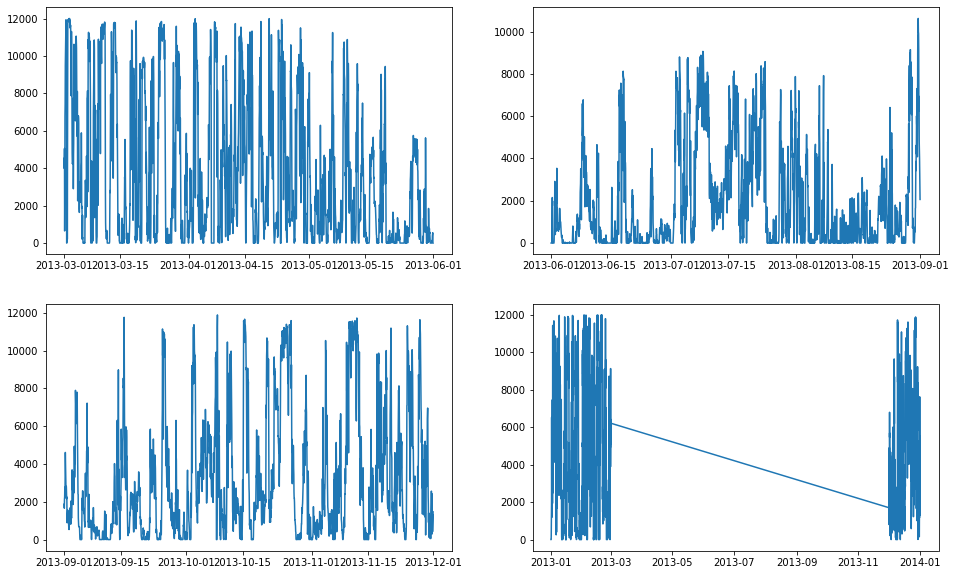

In [74]:
plt.figure(figsize=[16, 10])

pltDf = df.loc[np.logical_and(df['dateTime1'].dt.year == 2013,np.logical_or(df['month']==3,np.logical_or(df['month']==4,df['month']==5)))]
plt.subplot(221)
plt.plot(pltDf['dateTime1'],pltDf['windForce'])

pltDf = df.loc[np.logical_and(df['dateTime1'].dt.year == 2013,np.logical_or(df['month']==6,np.logical_or(df['month']==7,df['month']==8)))]
plt.subplot(222)
plt.plot(pltDf['dateTime1'],pltDf['windForce'])

pltDf = df.loc[np.logical_and(df['dateTime1'].dt.year == 2013,np.logical_or(df['month']==9,np.logical_or(df['month']==10,df['month']==11)))]
plt.subplot(223)
plt.plot(pltDf['dateTime1'],pltDf['windForce'])

pltDf = df.loc[np.logical_and(df['dateTime1'].dt.year == 2013,np.logical_or(df['month']==12,np.logical_or(df['month']==1,df['month']==2)))]
plt.subplot(224)
plt.plot(pltDf['dateTime1'],pltDf['windForce'])

plt.show()

## 2) 년도별, 계절별 평균 발전량 


> 년도별, 계절별 평균 발전량 = 겨울 > 봄 > 가을 > 여름





In [ ]:
df.head(5)

In [198]:
df1 = df.groupby(['year','season'],as_index=False).mean() # 년도별, 계절별 windForce 평균
df1 = df1[['year','season','windForce']] # 컬럼 여기 정의된 3개만 따로 해서 df1에 저장 
df1  =df1.rename(columns={'windForce':'windForceMean'})

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           28 non-null     int64  
 1   season         28 non-null     object 
 2   windForceMean  28 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 896.0+ bytes


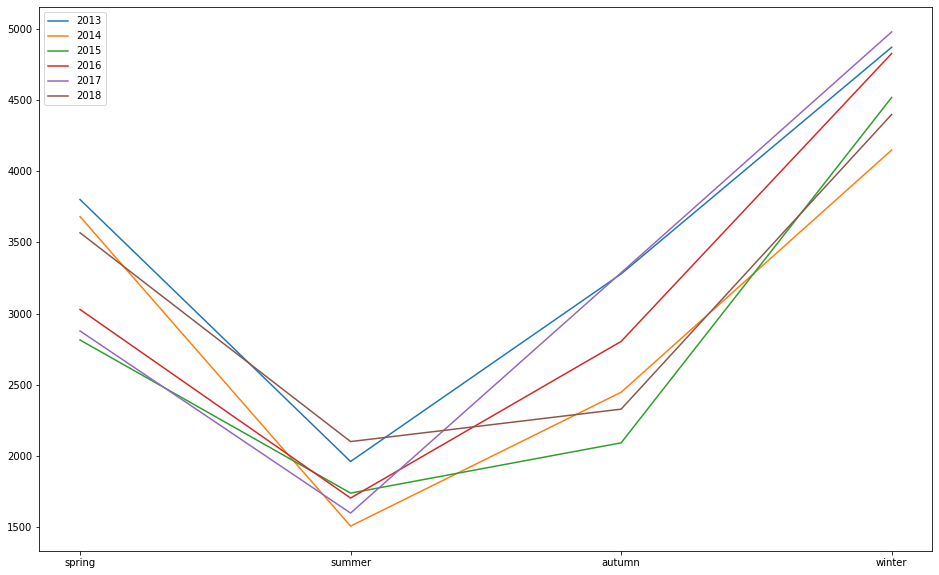

In [209]:
plt.figure(figsize=[16, 10])

a = 2013
val = ['spring','summer','autumn','winter']
for i in range(0,6): # 7까지 - 2019, 6까지 - 2018
  k = df1.loc[df1['year'] == a]
  plt.plot(k['season'],k['windForceMean'],label=a) 
  plt.xticks(k['season'], val) # x값 0,1,2,3 -> spring,summer,autumn,winter
  
  a = a + 1

plt.legend()
plt.show()

## 3) 년도별, 시간별 평균 발전량

> 년도별, 시간별 평균 발전량 = 13시 가장 발전량 많음





In [211]:
df1 = df.groupby(['year','time'],as_index=False).mean() # 년도별, 계절별 windForce 평균
df1 = df1[['year','time','windForce',]] # 컬럼 여기 정의된 3개만 따로 해서 df1에 저장 
df1  =df1.rename(columns={'windForce':'windForceMean'})

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           168 non-null    int64  
 1   time           168 non-null    object 
 2   windForceMean  168 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.2+ KB


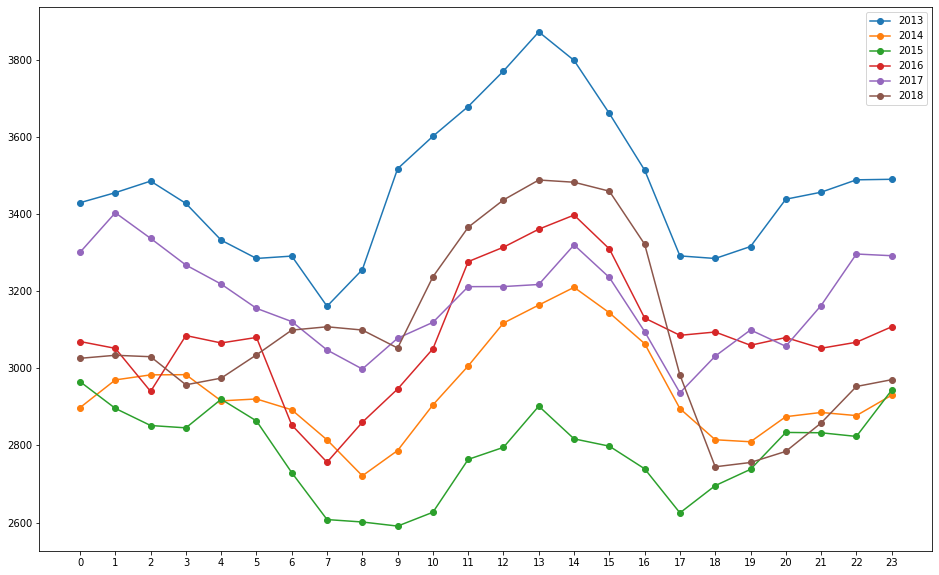

In [213]:
plt.figure(figsize=[16, 10])

a = 2013
val = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

for i in range(0,6): # 7까지 - 2019, 6까지 - 2018
  k = df1.copy()[df1['year'] == a] #복사해서 쓰기,,ㅎㅎ,,,copy()  안 그러면 warning 뜸
  k['time'] = pd.to_datetime(k['time'],format='%H:%M', errors='ignore') 
  k = k.sort_values(["time"], ascending=[True])
  plt.xticks(k['time'],val)
  plt.plot(k['time'],k['windForceMean'],label=a,marker="o")
  
  a = a + 1

plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


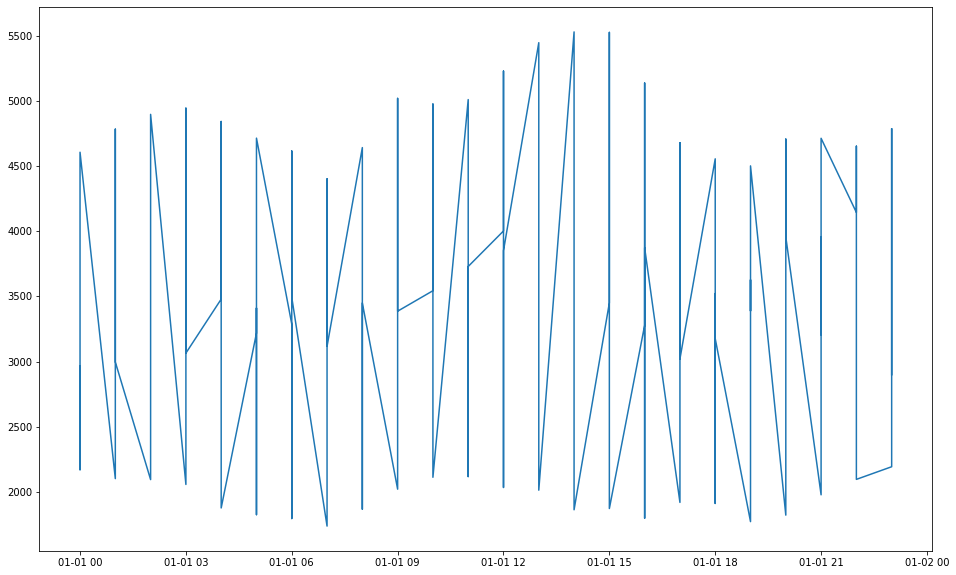

In [176]:
plt.figure(figsize=[16, 10])
k = df1.loc[df1['year'] == 2013]

k['time'] = pd.to_datetime(k['time'],format='%H:%M', errors='ignore') 
k = k.sort_values(["time"], ascending=[True])
plt.plot(k['time'],k['windForceMean'],label=a)

In [ ]:
k = k.sort_values(["time"], ascending=[True])
plt.plot(k['time'],k['windForceMean'],label=a)